<h1>Knowledge Based Systems - ML Course</h1>

In [1]:
# importing modules
import pandas as pd 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# load the dataset
irisi = load_iris() 

In [3]:
# feature names
irisi.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# create DataFrame with feature names as columns
df = pd.DataFrame(irisi.data, columns = irisi.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# create target column
df['target'] = irisi.target
irisi.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# see target ids
df[df.target == 1].head() # 1 - versicolor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [7]:
# create flower name column with target names
df['flower_name'] = df.target.apply(lambda x: irisi.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [9]:
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
59,5.2,2.7,3.9,1.4,1,versicolor
29,4.7,3.2,1.6,0.2,0,setosa
61,5.9,3.0,4.2,1.5,1,versicolor
117,7.7,3.8,6.7,2.2,2,virginica
47,4.6,3.2,1.4,0.2,0,setosa
138,6.0,3.0,4.8,1.8,2,virginica
60,5.0,2.0,3.5,1.0,1,versicolor
43,5.0,3.5,1.6,0.6,0,setosa
58,6.6,2.9,4.6,1.3,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor


In [10]:
from matplotlib import pyplot as plt 
df0 = df[df.target == 0] # see target 0flower_name

df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<Axes: xlabel='flower_name', ylabel='count'>

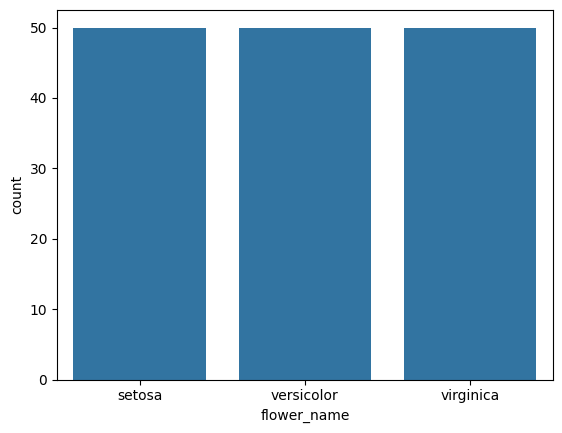

In [11]:
# SVM (Support Vector Machine)

# import all the modules required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# EDA
sns.countplot (x='flower_name', data=df)

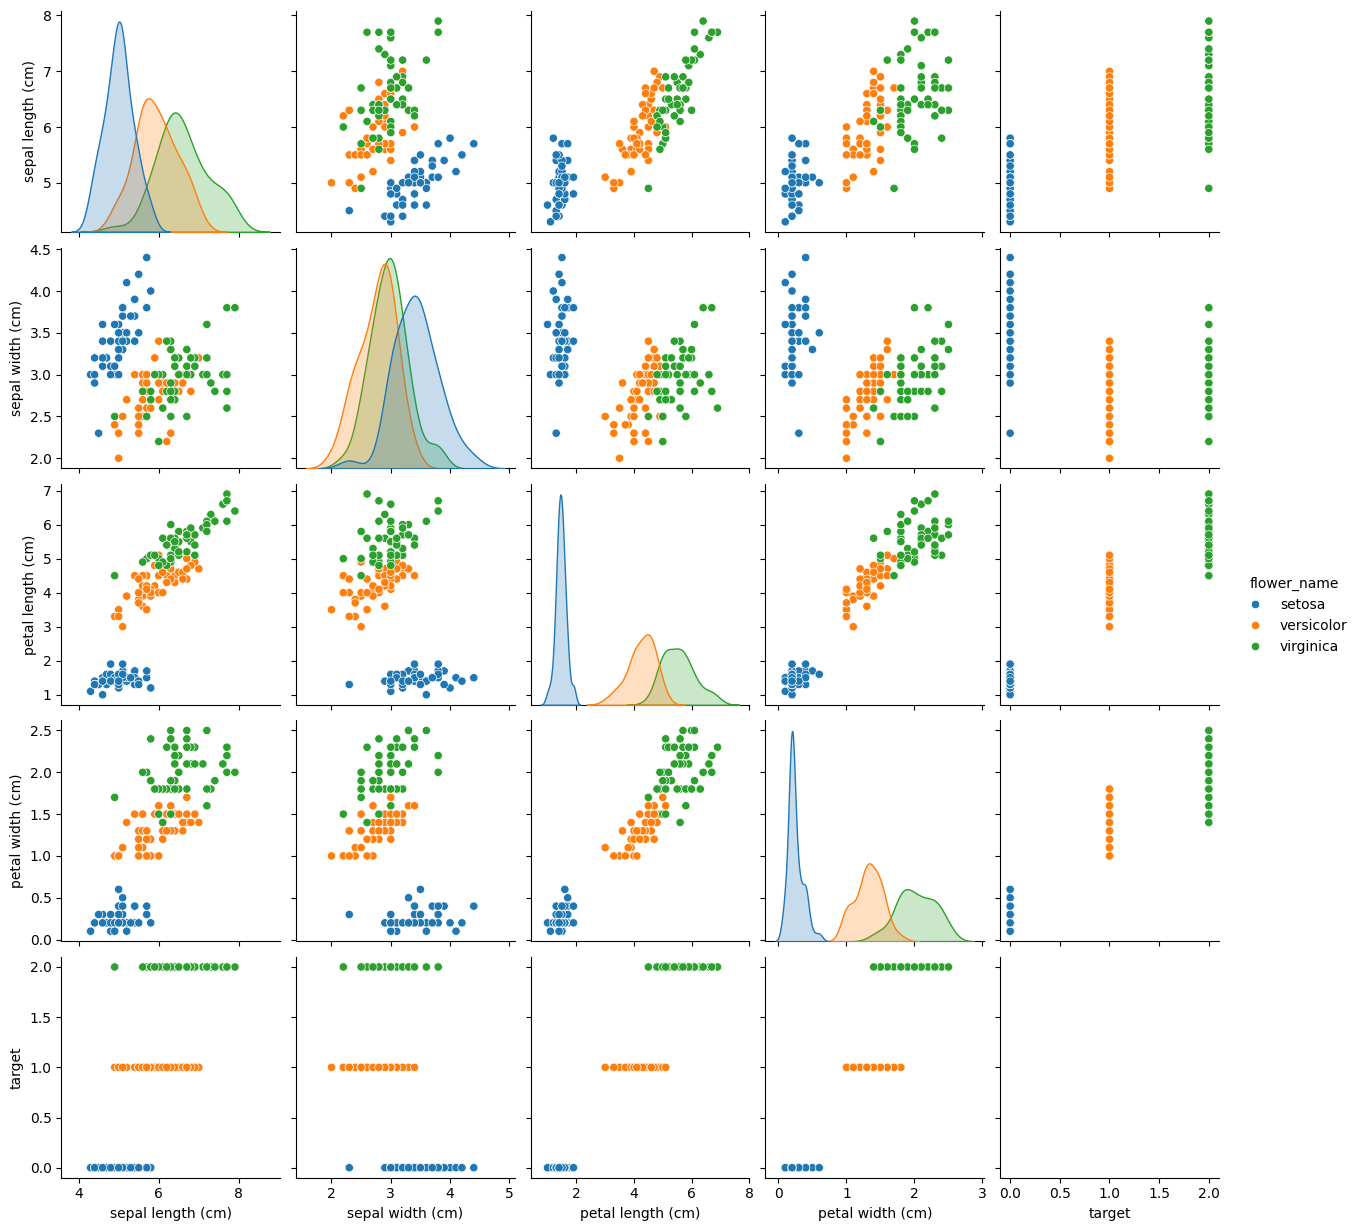

In [12]:
# correlations between variables
sns.pairplot(df, hue='flower_name')

In [13]:
X = df.drop('flower_name', axis=1) # without labels
y = df['flower_name'] # just labels

In [14]:
# apply LabelEncoder (convert from string to numbers) - optional beucase scikit-learn does it automatically
label_encoder = LabelEncoder()
y_encoder= label_encoder.fit_transform(y)
y_encoder

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
# enumerate through classes
for i, class_name in enumerate(label_encoder.classes_):
    print(f"{class_name}:{i}") # see which number coresponds to which label

setosa:0
versicolor:1
virginica:2


In [16]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoder, test_size=0.3, random_state=42) # 70% train test 30% test set

In [17]:
# SVM linear
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train) # train the model

SVC(kernel='linear')

In [18]:
# predict on the test data
predict = model_linear.predict(X_test)

In [19]:
# evaluate the model
confusion_mat = confusion_matrix(y_test, predict)
confusion_mat

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [20]:
print(classification_report(y_test, predict)) # precision, recall, f1 scores

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [21]:
# KNN (K Nearest Neighbors)

X = irisi.data # without labels
y = irisi.target # labels

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # split train and test sets

In [23]:
len(X_train) # length of train set

120

In [24]:
len(y_test) # length of train set

30

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# tunning for K
k_range = range(1, 27) # K from 1 to 26

scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k) # create the object
    knn.fit(X_train, y_train) # train the model
    y_pred = knn.predict(X_test)
    scores[k] = (y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

In [26]:
scores_list

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [27]:
# choose k = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X, y)

KNeighborsClassifier()

In [28]:
# show the accuracy after this training 
X_nou = [[3, 4, 5, 2], [5, 4, 2, 2]]
y_predict = knn.predict(X_nou)
y_predict

array([1, 0])

In [29]:
# SVM with csv file

import seaborn as sns 

# load dataset
flowers = pd.read_csv('iris.csv')

In [30]:
pd.DataFrame(flowers)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [31]:
flowers.info

<bound method DataFrame.info of      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]>

<Axes: xlabel='variety', ylabel='count'>

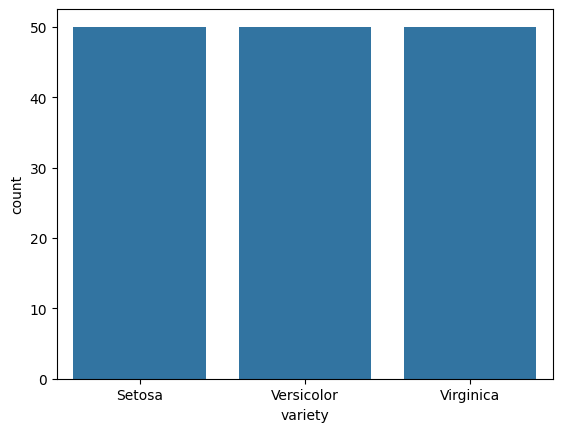

In [32]:
sns.countplot(x = 'variety', data = flowers) # correlations

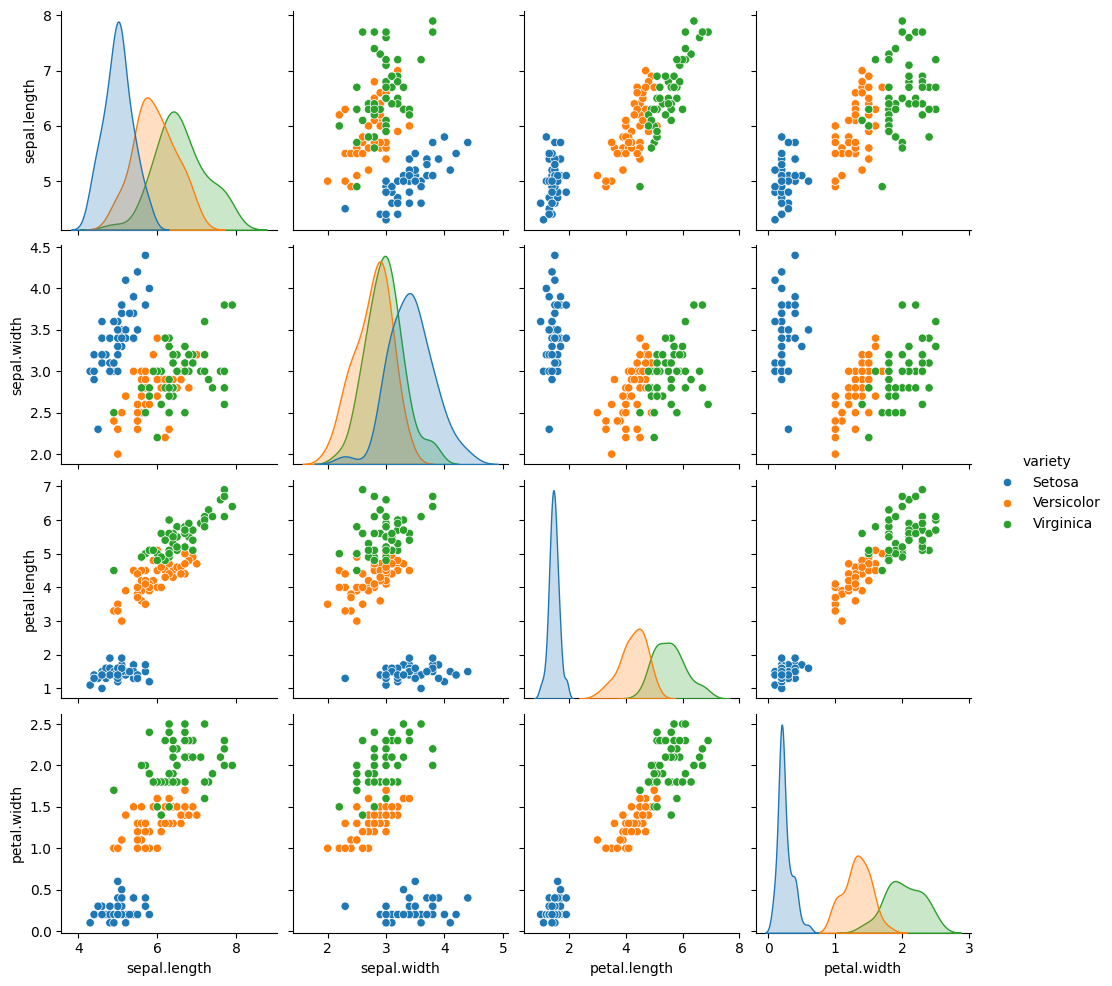

In [33]:
sns.pairplot(flowers, hue = 'variety')

In [34]:
flowers.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
X = flowers.drop('variety', axis = 1) # matrix without labels

X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
y = flowers['variety'] # matrix with labels
y.tail()

145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, dtype: object

In [37]:
# LabelEncoder

labelEncoderFlowers = LabelEncoder()

y_encoded = labelEncoderFlowers.fit_transform(y)
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.3, random_state = 42) # 30% test size

In [39]:
X_train.head()

,sepal.length,sepal.width,petal.length,petal.width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [40]:
X_test.head()

,sepal.length,sepal.width,petal.length,petal.width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [41]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [42]:
# SVM Linear

model = SVC(kernel='linear')
model.fit(X_train, y_train) # training

SVC(kernel='linear')

In [43]:
predicts = model.predict(X_test) # predict the model

In [44]:
# confusion matrix
mat_conf = confusion_matrix(y_test, predicts)
print(mat_conf) # diagonal is good

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [45]:
print(classification_report(y_test, predicts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [48]:
# SVM polynomial

model_polynom = SVC(kernel = 'poly', degree = 3, C = 1.0, coef0 = 1, gamma = 'scale')
model_polynom.fit(X_train, y_train)

SVC(coef0=1, kernel='poly')

In [51]:
predictions = model_polynom.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
# SVM RBF

model_rbf = SVC(kernel = 'rbf', C = 1.0, gamma = 'scale')
model_rbf.fit(X_train, y_train)

In [52]:
predictions = model_polynom.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [56]:
# Naive Bayes

new_flowers = pd.read_csv('iris.csv')
new_flowers.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [58]:
# Encoding
label_encoder = LabelEncoder()
new_flowers['variety'] = label_encoder.fit_transform(new_flowers['variety'])
new_flowers.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
60,5.0,2.0,3.5,1.0,1
134,6.1,2.6,5.6,1.4,2
40,5.0,3.5,1.3,0.3,0
74,6.4,2.9,4.3,1.3,1
95,5.7,3.0,4.2,1.2,1


In [66]:
X = new_flowers.drop('variety', axis = 1)
y = new_flowers['variety']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [68]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [71]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [72]:
# Normalization

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = scaler.transform(X_test)

In [47]:
# Decision Trees
